In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import itertools

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics


In [2]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [3]:
# Applying confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk.tokenize import RegexpTokenizer
# from sklearn.preprocessing import FunctionTransformer
# import re
# import swifter

# ps = PorterStemmer()

# def clean_text(text):
#     # Tokenize and Remove non alphanumeric characters
#     tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
#     tokens = tokenizer.tokenize(text)
#     allalpha_tokens = [word for word in tokens if word.isalpha()]

#     # Porter stemmer back to basic english words
#     words = [ps.stem(word) for word in allalpha_tokens if not word in stopwords.words('english')]
#     words = ' '.join(words)
#     if (words == ''):
#         return np.nan
#     return words

# def clean_content(series):
#     series.apply(lambda x: clean_text(x))

# stemmer = FunctionTransformer(clean_content)

In [5]:
# For training models START HERE
combined_content_df = pd.read_csv('../Datasets/Combined_Dataset/proper_processed_content.csv')

combined_content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879748 entries, 0 to 879747
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    879748 non-null  object
 1   content  879747 non-null  object
dtypes: object(2)
memory usage: 13.4+ MB


In [6]:
combined_content_df = combined_content_df.dropna()
combined_content_df.reset_index(drop=True, inplace=True)
combined_content_df = combined_content_df.replace(to_replace='None', value=np.nan).dropna()
combined_content_df = combined_content_df[combined_content_df.label != 'label']
combined_content_df['content'] = combined_content_df['content'].astype('string')

combined_content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879713 entries, 0 to 879746
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    879713 non-null  object
 1   content  879713 non-null  string
dtypes: object(1), string(1)
memory usage: 20.1+ MB


In [7]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(combined_content_df, test_size=0.5, random_state=42)

train_df = train_df.sample(frac=0.1)
test_df = test_df.sample(frac=0.05)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21993 entries, 404133 to 15243
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    21993 non-null  object
 1   content  21993 non-null  string
dtypes: object(1), string(1)
memory usage: 515.5+ KB


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43986 entries, 521463 to 494326
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    43986 non-null  object
 1   content  43986 non-null  string
dtypes: object(1), string(1)
memory usage: 1.0+ MB


In [9]:
X_train = train_df['content']
Y_train = train_df['label']
X_test = test_df['content']
Y_test = test_df['label']

In [10]:
train_df.label.unique()

array(['fake', 'reliable'], dtype=object)

In [11]:
X_train

521463    break secret servic director julia pierson res...
741344    an ex one disgrac former fox new host bill o s...
82760     senior spend money differ averag person health...
617408    denver ask conserv respond suprem court decis ...
199437    wherea presid unit state take oath pursuant ar...
                                ...                        
744982    on friday fairfield district superior court ju...
692583    we leav eu march it new it good govern move am...
654111    with eye mississippi sen roger wicker focus ta...
23009     bless mari blondin headlin bitcoin blockchain ...
494326    калининград или гора губернатору калининградск...
Name: content, Length: 43986, dtype: string

# Voting Claassifier

In [12]:
import pickle

pa_content_model = pickle.load(open('./models/combined_content_pa_model.sav', 'rb'))

In [13]:
dt = Pipeline([('tfidf', TfidfVectorizer()), ('decision_tree', DecisionTreeClassifier(max_depth=5))])

lr = Pipeline([('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

svc = Pipeline([('tfidf', TfidfVectorizer()), ('svc', SVC(kernel='rbf'))])

svm =  Pipeline([('tfidf', TfidfVectorizer()), ('svm', SGDClassifier(loss='hinge', alpha=1e-3, penalty='l2', random_state=42))])

rf = Pipeline([('tfidf', TfidfVectorizer()), ('random_forest', RandomForestClassifier(max_depth=40, n_estimators=400))])

pa = Pipeline([('pa_model', pa_content_model)])

In [14]:
voting_model = VotingClassifier(
    estimators=[
        ('svm',svm),
        ('rbf_svc',svc),
        ('lr',lr),
        ('passive_aggressive',pa_content_model),
        ('dt',dt), 
        ('random_forest', rf)
    ], 
    voting='hard',
    n_jobs=-1,
    verbose=True
)

voting_model.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('svm',
                                               SGDClassifier(alpha=0.001,
                                                             random_state=42))])),
                             ('rbf_svc',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('svc', SVC())])),
                             ('lr',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('lr', LogisticRegression())])),
                             ('passive_aggressive',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(...
                                               PassiveAggressiveClassifier(loss='squared_hinge',
                               

Accuracy:  0.8718683217387351
[[ 5936  2391]
 [  427 13239]]
              precision    recall  f1-score   support

        fake       0.93      0.71      0.81      8327
    reliable       0.85      0.97      0.90     13666

    accuracy                           0.87     21993
   macro avg       0.89      0.84      0.86     21993
weighted avg       0.88      0.87      0.87     21993

Accuracy :  0.8718683217387351
Precison :  0.8947198406832042
Recall :  0.8718683217387351
F1 :  0.8761387278297529
Confusion matrix, without normalization


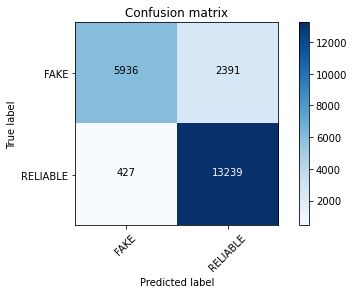

In [15]:
voting_pred = voting_model.predict(X_test)
voting_score = metrics.accuracy_score(Y_test, voting_pred)
print("Accuracy: ", voting_score)
voting_cm = metrics.confusion_matrix(Y_test, voting_pred)
print_metrices(voting_pred, Y_test)
plot_confusion_matrix(voting_cm, classes=['FAKE', 'RELIABLE'])

In [16]:
backup = combined_content_df.sample(frac = 0.1)

backup_label = backup['label']
backup_test = backup['content']

In [17]:
backup_voting_pred = voting_model.predict(backup_test)
backup_voting_score = metrics.accuracy_score(backup_label, backup_voting_pred)
print("Accuracy: ", backup_voting_score)
backup_voting_cm = metrics.confusion_matrix(backup_label, backup_voting_pred)


Accuracy:  0.8800286458037307


NameError: name 'backup_backup_label' is not defined

[[24013  9008]
 [ 1546 53404]]
              precision    recall  f1-score   support

        fake       0.94      0.73      0.82     33021
    reliable       0.86      0.97      0.91     54950

    accuracy                           0.88     87971
   macro avg       0.90      0.85      0.86     87971
weighted avg       0.89      0.88      0.88     87971

Accuracy :  0.8800286458037307
Precison :  0.9007816621658281
Recall :  0.8800286458037307
F1 :  0.8838557501137473
Confusion matrix, without normalization


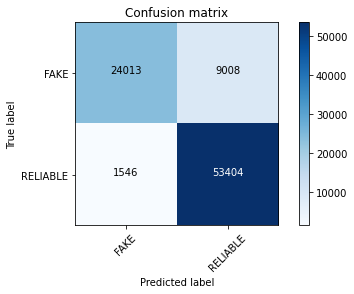

In [18]:
print_metrices(backup_voting_pred, backup_label)
plot_confusion_matrix(backup_voting_cm, classes=['FAKE', 'RELIABLE'])

In [19]:
import pickle

filename = 'voting_classifier_jerry.sav'
pickle.dump(voting_model, open(filename, 'wb'))

print("Done saving model")

Done saving model
